In [75]:
#dataframes
import pandas as pd
import numpy as np
import random as rnd

#viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#statistics
from scipy import stats
from scipy.stats import norm, skew

#unsupervised learning
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

#Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, Imputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample, check_array

#supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest

## Data Understanding

In [11]:
df_train = pd.read_csv('data_input/npl_train.csv', index_col=0)
col = df_train.columns

df_test = pd.read_csv('data_input/npl_test.csv', index_col=0)
y_train = df_train['flag_kredit_macet'].values

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data = all_data.reindex(columns=col)
all_data.drop(['flag_kredit_macet'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))

all_data size is : (17707, 22)


In [12]:
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
pd.options.display.float_format = '{:,.3f}'.format

# Bag3

In [100]:
bag3 = df_train.iloc[:,15:]

In [101]:
bag3.head()

,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
X,,,,,,,,
1,94.000,"13,161.500",0.004,0.000,0.012,0.018,0.013,0.022
2,"1,012.000",0.000,0.000,0.000,0.000,0.000,0.004,0.000
3,0.000,0.000,0.000,0.000,0.041,0.048,0.249,0.268
4,"2,536,660.000","145,333.500",0.028,0.121,0.056,0.017,0.102,0.347
5,"2,666,558.000","2,975,932.500",0.595,0.267,0.323,0.131,0.708,0.337


In [102]:
bag3.dtypes

total_pemakaian                  float64
sisa_tagihan_per_jumlah_kartu    float64
sisa_tagihan_per_limit           float64
total_pemakaian_per_limit        float64
pemakaian_3bln_per_limit         float64
pemakaian_6bln_per_limit         float64
utilisasi_3bulan                 float64
utilisasi_6bulan                 float64
dtype: object

In [103]:
bag3.describe()

,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,"15,493.000","15,493.000","15,493.000","15,493.000","15,493.000","15,493.000","15,493.000","15,493.000"
mean,"2,100,421.119","2,968,060.012",0.468,0.109,0.167,0.203,0.571,0.534
std,"8,092,611.951","6,262,191.790",0.473,0.200,0.192,0.274,0.412,0.432
min,"-15,667,200.000",0.000,0.000,-0.632,-0.126,-0.569,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.035,0.033,0.189,0.155
50%,"248,000.000","1,209,318.000",0.335,0.022,0.108,0.117,0.575,0.496
75%,"1,512,235.000","3,088,477.000",0.930,0.128,0.239,0.285,0.917,0.863
max,"314,000,000.000","148,000,000.000",7.240,4.600,3.490,8.110,8.126,9.730


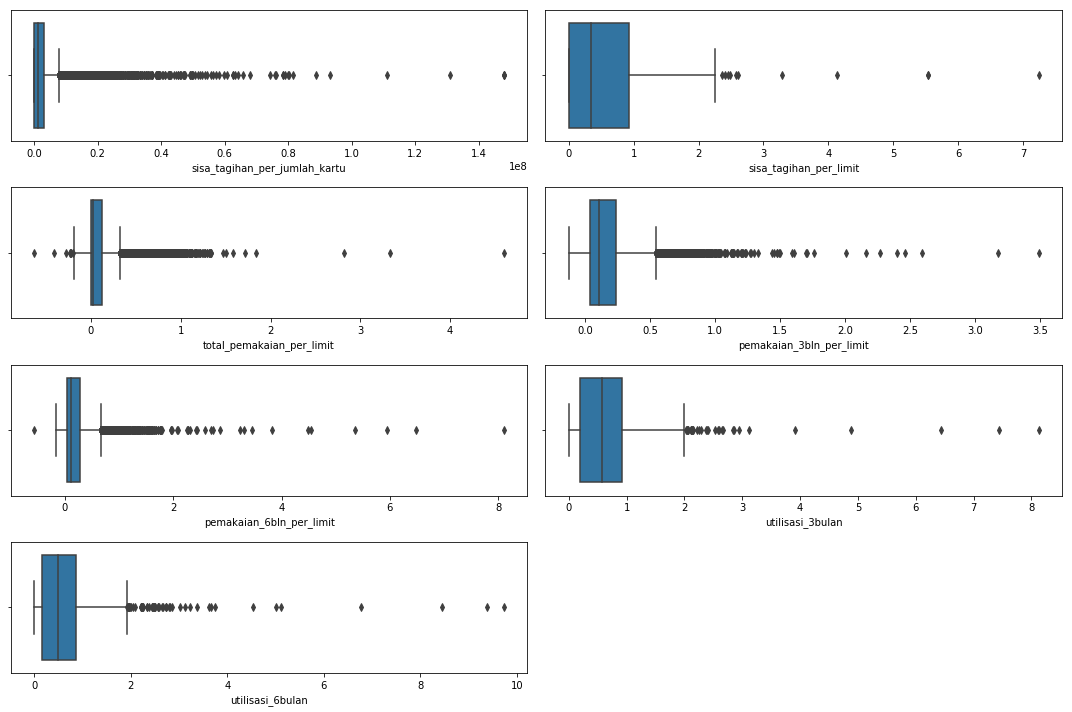

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(421)
sns.boxplot(bag3.sisa_tagihan_per_jumlah_kartu)
plt.subplot(422)
sns.boxplot(bag3.sisa_tagihan_per_limit)
plt.subplot(423)
sns.boxplot(bag3.total_pemakaian_per_limit)
plt.subplot(424)
sns.boxplot(bag3.pemakaian_3bln_per_limit)
plt.subplot(425)
sns.boxplot(bag3.pemakaian_6bln_per_limit)
plt.subplot(426)
sns.boxplot(bag3.utilisasi_3bulan)
plt.subplot(427)
sns.boxplot(bag3.utilisasi_6bulan)

plt.tight_layout()
plt.show()

In [104]:
scal = StandardScaler()
scal.fit(bag3)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [105]:
data = scal.transform(bag3)
col = bag3.columns
idx = bag3.index

In [106]:
bag3 =  pd.DataFrame(data=data, index=idx, columns=col)
bag3.head()

,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
X,,,,,,,,
1,-0.260,-0.472,-0.982,-0.546,-0.810,-0.674,-1.354,-1.184
2,-0.259,-0.474,-0.990,-0.546,-0.871,-0.739,-1.376,-1.234
3,-0.260,-0.474,-0.990,-0.546,-0.660,-0.565,-0.781,-0.615
4,0.054,-0.451,-0.931,0.057,-0.580,-0.677,-1.139,-0.433
5,0.070,0.001,0.268,0.786,0.809,-0.260,0.332,-0.456


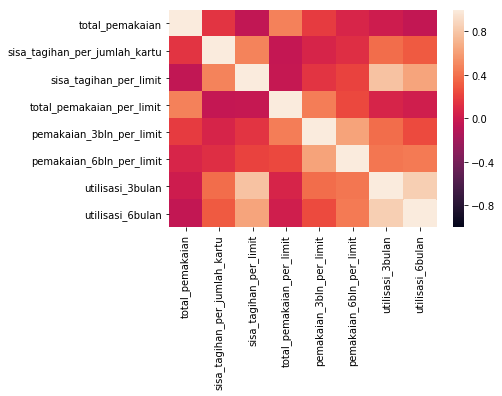

In [109]:
cor = bag3.corr()
sns.heatmap(cor, vmin=-1, vmax=1)

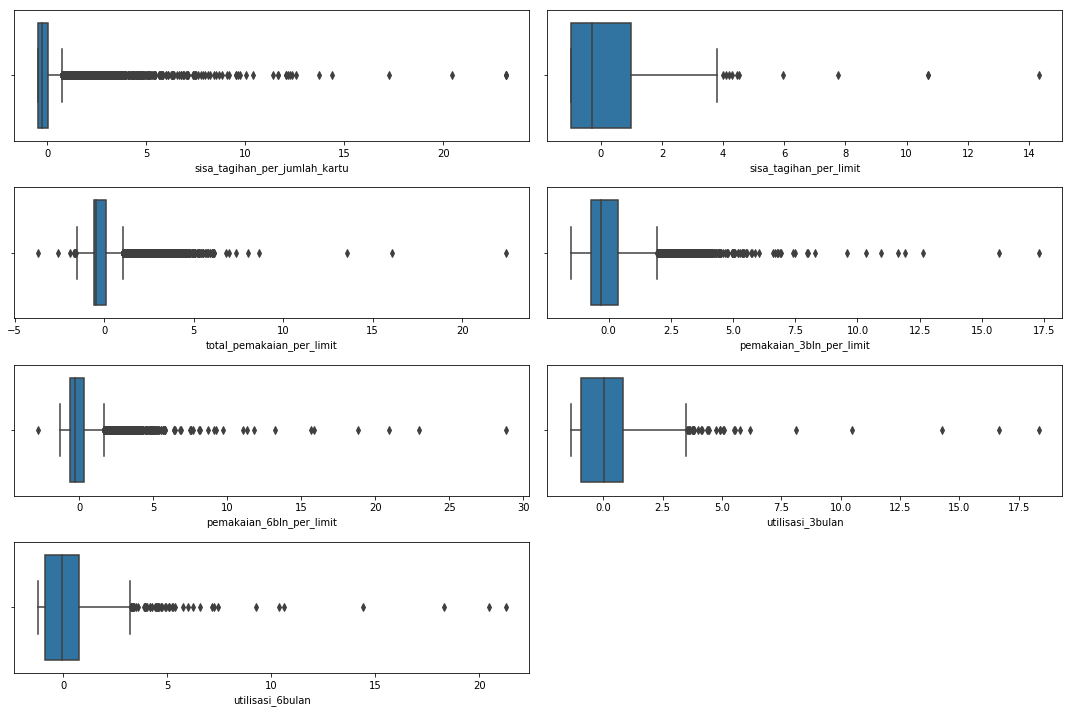

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(421)
sns.boxplot(bag3.sisa_tagihan_per_jumlah_kartu)
plt.subplot(422)
sns.boxplot(bag3.sisa_tagihan_per_limit)
plt.subplot(423)
sns.boxplot(bag3.total_pemakaian_per_limit)
plt.subplot(424)
sns.boxplot(bag3.pemakaian_3bln_per_limit)
plt.subplot(425)
sns.boxplot(bag3.pemakaian_6bln_per_limit)
plt.subplot(426)
sns.boxplot(bag3.utilisasi_3bulan)
plt.subplot(427)
sns.boxplot(bag3.utilisasi_6bulan)

plt.tight_layout()
plt.show()

In [72]:
kmn = KMeans(n_clusters=2,max_iter=40)
kmn.fit(bag3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=40,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
bag3['klompok'] = kmn.predict(bag3)
bag3['score'] = df_train['flag_kredit_macet']

In [94]:
cacat = bag3.loc[bag3['score']==0,:]

In [95]:
ifo = IsolationForest()
ifo.fit(cacat)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [96]:
bag3['iso'] = ifo.predict(bag3)
bag3.loc[bag3['iso']==1,'iso']=0
bag3.loc[bag3['iso']==-1,'iso']=1

In [97]:
confusion_matrix(bag3['score'],bag3['iso'])

array([[12720,  1414],
       [ 1228,   131]], dtype=int64)

In [84]:
bag3['iso'].value_counts()

 1    10673
-1     4820
Name: iso, dtype: int64

In [37]:
#edit datatype
all_data['outstanding'] = all_data['outstanding'].astype(float) #agar mudah dalam perhitungan
all_data['jumlah_kartu'] = all_data['jumlah_kartu'].astype(object) #tipe data bukan numeric melainkan ordinal/kategorik
all_data['skor_delikuensi'] = all_data['skor_delikuensi'].astype(object) #tipe data bukan numeric/rasio melainkan ordinal

In [38]:
r_train, c_train = df_train.shape
r_test, c_test = df_test.shape

print('#baris df_train :', r_train, '#kolom df_train :', c_train)
print('#baris df_test :', r_test, '#kolom df_test :', c_test)

#baris df_train : 15493 #kolom df_train : 23
#baris df_test : 2214 #kolom df_test : 22


In [40]:
print(all_data.isnull().sum(), '\n')
# print(df_train.isnull().sum())
# print(df_test.isnull().sum())

jumlah_kartu                             0
jumlah_tahun_sejak_pembukaan_kredit      0
kode_cabang                            114
limit_kredit                             0
outstanding                              0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
persentasi_overlimit                     0
rasio_pembayaran                         0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
sisa_tagihan_tidak_terbayar              0
skor_delikuensi                          0
tagihan                                  0
total_pemakaian                          0
total_pemakaian_per_limit                0
total_pemakaian_retail                   0
total_pemakaian_tunai                    0
utilisasi_3bulan                         0
utilisasi_6bulan                         0
dtype: int64 



In [ ]:
all_data.describe()

In [98]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Skew in numerical features: 



,Skew
rasio_pembayaran,52.784
skor_delikuensi,32.739
total_pemakaian_tunai,25.772
total_pemakaian,17.790
total_pemakaian_retail,16.744


In [ ]:
all_data.describe(include=['O'])

In [ ]:
#check imbalanced target
df_train['flag_kredit_macet'].value_counts(normalize=True)

## EDA Viz

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
sns.distplot((all_data['outstanding']))

plt.subplot(2,3,2)
sns.distplot((all_data['limit_kredit']))

plt.subplot(2,3,3)
sns.distplot((all_data['tagihan']))

plt.subplot(2,3,4)
sns.distplot((all_data['total_pemakaian_retail']))

plt.subplot(2,3,5)
sns.distplot((all_data['sisa_tagihan_tidak_terbayar']))

plt.subplot(2,3,6)
sns.distplot((all_data['tagihan']))
plt.tight_layout()
plt.show()

In [ ]:
corr_df = all_data.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, cmap='RdYlGn_r', vmin=-1, vmax=1, linewidth=2.5)
plt.show()

In [ ]:
pd.crosstab(df_train['jumlah_kartu'],df_train['flag_kredit_macet'],normalize='index').plot.bar(stacked=True,rot=0)
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
pd.crosstab(df_train['skor_delikuensi'],df_train['flag_kredit_macet'],normalize='index').plot.bar(stacked=True,rot=0)
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
pd.crosstab(df_train['kode_cabang'],df_train['flag_kredit_macet'],normalize='index').plot.bar(stacked=True,rot=0)
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Preprocessing

In [ ]:
all_data2 = all_data.copy()

In [9]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
#     all_data2[feat] += 1
    all_data[feat] = np.cbrt(all_data[feat])
    
# all_data2[skewed_features] = np.log1p(all_data2[skewed_features])

There are 19 skewed numerical features to Box Cox transform


In [11]:
train = all_data[:r_train]
test = all_data[r_train:]

In [12]:
# test.loc[test['rasio_pembayaran'].isnull()]
all_data.iloc[16926,:]

jumlah_kartu                                2
jumlah_tahun_sejak_pembukaan_kredit     2.284
kode_cabang                                 A
limit_kredit                          370.843
outstanding                           200.699
pemakaian_3bln_per_limit                0.244
pemakaian_6bln_per_limit                0.205
persentasi_overlimit                    0.000
rasio_pembayaran                      -26.274
rasio_pembayaran_3bulan               -11.702
rasio_pembayaran_6bulan                 5.580
sisa_tagihan_per_jumlah_kartu           0.000
sisa_tagihan_per_limit                  0.000
sisa_tagihan_tidak_terbayar             0.000
skor_delikuensi                             0
tagihan                               114.029
total_pemakaian                        80.973
total_pemakaian_per_limit               0.218
total_pemakaian_retail                 80.973
total_pemakaian_tunai                   0.000
utilisasi_3bulan                        0.576
utilisasi_6bulan                  

In [13]:
all_data.head()

,jumlah_kartu,jumlah_tahun_sejak_pembukaan_kredit,kode_cabang,limit_kredit,outstanding,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,persentasi_overlimit,rasio_pembayaran,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,sisa_tagihan_tidak_terbayar,skor_delikuensi,tagihan,total_pemakaian,total_pemakaian_per_limit,total_pemakaian_retail,total_pemakaian_tunai,utilisasi_3bulan,utilisasi_6bulan
0,2,2.489,I,191.293,33.068,0.227,0.261,0.000,4.675,4.213,4.642,23.610,0.156,29.747,0,28.618,4.547,0.024,4.547,0.000,0.237,0.280
1,2,0.909,A,215.443,64.528,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,63.377,10.040,0.047,10.040,0.000,0.162,0.067
2,3,2.207,A,303.659,189.167,0.343,0.363,0.000,4.642,4.642,4.656,0.000,0.000,0.000,0,160.826,0.000,0.000,0.000,0.000,0.629,0.645
3,4,2.703,G,275.892,151.782,0.383,0.256,0.000,4.642,2.924,2.829,52.576,0.303,83.459,0,48.092,136.381,0.494,136.381,0.000,0.467,0.702
4,2,1.186,A,215.443,211.061,0.686,0.508,0.000,4.579,4.602,4.639,143.838,0.841,181.225,0,182.709,138.670,0.644,138.670,0.000,0.891,0.696


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot((all_data['outstanding']))

plt.subplot(1,3,2)
sns.distplot((all_data['limit_kredit']))

plt.subplot(1,3,3)
sns.distplot((all_data['tagihan']))
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot((all_data['total_pemakaian_retail']))

plt.subplot(1,3,2)
sns.distplot((all_data['sisa_tagihan_tidak_terbayar']))

plt.subplot(1,3,3)
sns.distplot((all_data['tagihan']))
plt.show()

In [21]:
for i in all_data:
    print(i)

jumlah_kartu
jumlah_tahun_sejak_pembukaan_kredit
kode_cabang
limit_kredit
outstanding
pemakaian_3bln_per_limit
pemakaian_6bln_per_limit
persentasi_overlimit
rasio_pembayaran
rasio_pembayaran_3bulan
rasio_pembayaran_6bulan
sisa_tagihan_per_jumlah_kartu
sisa_tagihan_per_limit
sisa_tagihan_tidak_terbayar
skor_delikuensi
tagihan
total_pemakaian
total_pemakaian_per_limit
total_pemakaian_retail
total_pemakaian_tunai
utilisasi_3bulan
utilisasi_6bulan


In [32]:
for i in all_data:
    i['pembayaran'] = i['tagihan']*i['rasio_pembayaran']
    i['pembayaran_3bulan'] = i['tagihan']*i['rasio_pembayaran_3bulan']
    i['pembayaran_6bulan'] = i['tagihan']*i['rasio_pembayaran_6bulan']
    i['pemakaian_3bln'] = i['limit_kredit']*i['pemakaian_3bln_per_limit']
    i['pemakaian_6bln'] = i['limit_kredit']*i['pemakaian_6bln_per_limit']

In [33]:
# df_train.columns
col = ['outstanding', 'limit_kredit', 'tagihan', 'total_pemakaian_tunai', 'total_pemakaian_retail',
     'sisa_tagihan_tidak_terbayar', 'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'pembayaran',
     'pembayaran_3bulan', 'pembayaran_6bulan', 'pemakaian_3bln', 'pemakaian_6bln']

In [34]:
for i in all_data:
    for j in col:
        i[j] = np.cbrt(i[j])

In [ ]:
for i in all_data:
    i = pd.get_dummies(i,drop_first=True)

In [ ]:
df_train.head()

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()


In [ ]:
df_1 = df_train[df_train['flag_kredit_macet']==1]
df_2 = df_train[df_train['flag_kredit_macet']==0].sample(1359)
df_train = pd.concat([df_1,df_2])

In [ ]:
X = df_train.drop(['flag_kredit_macet'],axis=1)
y = df_train['flag_kredit_macet']

In [ ]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(X,y)

In [ ]:
print(confusion_matrix(y,rf.predict(X)),'\n')
print(classification_report(y,rf.predict(X)))
print(cross_val_score(rf,X,y).mean())

In [ ]:
fpr, tpr, thresholds = roc_curve(y, rf.predict(X))

In [ ]:
rf.score(X,y)

In [ ]:
auc(fpr,tpr)